In [87]:
# Load the required packages
library(tidyverse)    # Data manipulation and visualization
library(tidytext)     # Text mining with tidy data principles
library(wordcloud2)   # Word cloud visualization
library(tm)           # Text mining utilities
library(SnowballC)    # Stemming
library(ggplot2)      # Data visualization
library(dplyr)        # Data manipulation
library(stringr)      # String manipulation
library(knitr)        # For nice table output
library(scales)       # For better plot scales

In [88]:
#Load Mandate For Leadership text data
MFL_text <- readLines("MandateForLeadership_FULL.txt")

# Examine the structure of our data
str(MFL_text)

# Look at the first few rows
head(MFL_text, 10)



 chr [1:3673] "Section Three" "THE GENERAL WELFARE" ...


[1] "Section Three"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
 [2] "THE GENERAL WELFARE"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
 [3] "When our Founders wrote in the Constitution that the federal government .would �promote the general Welfare,� they could not have fathomed a .massive bureaucracy that would someday spend $3 trillion in a single year�roughly the sum, combined, spent by the departments covered in this section in 2022. Approximately half of that colossal sum was spent by the Department of Health and Human Services (HHS) alone�the belly of the massive behemoth that is the modern administrative state."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
 [4] "HHS is home to Medicare and Medicaid, the principal drivers of our $31 trillion national debt. When Congress passed and President Lyndon B. Johnson signed into law these programs, they were set on autopilot with no plan for how to pay for them. The first year that Medicare spending was visible on the books was 1967. From that point on through 2020�according to the American Main Street Initia�tive�s analysis of official federal tallies�Medicare and Medicaid combined cost $17.8 trillion, while our combined federal deficits over that same span were $17.9 trillion. In essence, our deficit problem is a 

In [90]:
#Build the main tibble

MFL_text_tbl <- tibble(
    document_id = seq_along(MFL_text),
    text = MFL_text
    )

#Clean clean_MFL_text 
clean_MFL_text <- MFL_text_tbl %>%
  # Rids texts of unrecognizable characters
  mutate( text = iconv(text, from = "", to = "UTF-8", sub = "byte"))%>% 
  # Convert to lowercase  
  mutate(text = tolower(text))%>%
  # Remove punctuation
  mutate(text = str_replace_all(text, "[[:punct:]]", " "))%>%
  # Remove extra whitespace
  mutate(text = str_squish(text)) %>%
  # Remove Twitter handles
  mutate(text = str_replace_all(text, "https?://\\S+", " "))%>%
  # Remove URLs (simple pattern)
  mutate(text = str_replace_all(text, "https?://\\S+", ""))%>%
  # Remove hashtags but keep the words
  mutate(text = str_replace_all(text, "#", ""))%>% 
  # Add row numbers for tracking
  filter(text !="")

head(clean_MFL_text)

document_id,text
<int>,<chr>
1,section three
2,the general welfare
3,when our founders wrote in the constitution that the federal government would �promote the general welfare � they could not have fathomed a massive bureaucracy that would someday spend $3 trillion in a single year�roughly the sum combined spent by the departments covered in this section in 2022 approximately half of that colossal sum was spent by the department of health and human services hhs alone�the belly of the massive behemoth that is the modern administrative state
4,hhs is home to medicare and medicaid the principal drivers of our $31 trillion national debt when congress passed and president lyndon b johnson signed into law these programs they were set on autopilot with no plan for how to pay for them the first year that medicare spending was visible on the books was 1967 from that point on through 2020�according to the american main street initia�tive�s analysis of official federal tallies�medicare and medicaid combined cost $17 8 trillion while our combined federal deficits over that same span were $17 9 trillion in essence our deficit problem is a medicare and medicaid problem
5,hhs is also home to the centers for disease control and prevention cdc and the national institutes of health nih the duo most responsible�along with president joe biden�for the irrational destructive un american mask and vaccine mandates that were imposed upon an ostensibly free people during the covid 19 pandemic all along it was clear from randomized controlled trials�the gold standard of medical research�that masks provide little to no benefit in preventing the spread of viruses and might even be counterproductive yet the cdc ignored these high quality rcts cherry picked from politically malleable �observational studies � and declared that everyone except children and infants below the age of two should don masks under covid as former director of hhs�s office of civil rights roger severino writes in chapter 14 the cdc exposed itself as �perhaps the most incompetent and arrogant agency in the federal government �
6,nor is the cdc the only villain in this play severino writes of the national institutes of health �despite its popular image as a benign science agency nih was responsible for paying for research in aborted baby body parts human animal chimera experiments��in which the genes of humans and animals are mixed �and gain of function viral research that may have been responsible for covid 19 � severino writes that �anthony fauci�s division of the nih��the national institute of allergy and infectious diseases��owns half the patent for the moderna covid 19 vaccine � and �several nih employees� receive �up to $150 000 annually from moderna vaccine sales � that would be the same experimental mrna vaccine that the cdc now wants to force on children who are at little to no risk from covid 19 but at great risk from public health officials


In [92]:
# Create empty factor column and assign levels
clean_MFL_text$label <- factor( rep(NA, nrow(clean_MFL_text)), 
                        levels = c( "Reproductive and Maternal Health", 
                                    "Contraception and Family Planning", 
                                    "Gender Definitions and Healthcare Access", 
                                    "Environmental Regulation and EPA Policy", 
                                    "Environmental Health and Community Impacts", 
                                    "Marriage and Women" ) )

clean_MFL_text$label

[1] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
  [15] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
  [29] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
  [43] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
  [57] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
  [71] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
  [85] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
  [99] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [113] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [127] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [141] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [155] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [169] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [183] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [197] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [211] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [225] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [239] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [253] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [267] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [281] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [295] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [309] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [323] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [337] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [351] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [365] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [379] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [393] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [407] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [421] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [435] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [449] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [463] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [477] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [491] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [505] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [519] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [533] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [547] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [561] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [575] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [589] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [603] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [617] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [631] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [645] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [659] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [673] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [687] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [701] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [715] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>

In [93]:
# Assign labels 
#clean_MFL_text <- clean_MFL_text %>% 
    #mutate(document_id = row_number())

clean_MFL_text$label[clean_MFL_text$document_id==1] <- "Environmental Regulation and EPA Policy" 
clean_MFL_text$label[clean_MFL_text$document_id==2] <- "Marriage and Women" 
clean_MFL_text$label[clean_MFL_text$document_id==3] <- "Gender Definitions and Healthcare Access" 
clean_MFL_text$label[clean_MFL_text$document_id==4] <- "Environmental Regulation and EPA Policy" 
clean_MFL_text$label[clean_MFL_text$document_id==5] <- "Environmental Health and Community Impacts" 
clean_MFL_text$label[clean_MFL_text$document_id==6] <- "Marriage and Women"

glimpse(clean_MFL_text)

Rows: 2,606
Columns: 3
$ document_id <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…
$ text        <chr> "section three", "the general welfare", "when our founders…
$ label       <fct> Environmental Regulation and EPA Policy, Marriage and Wome…


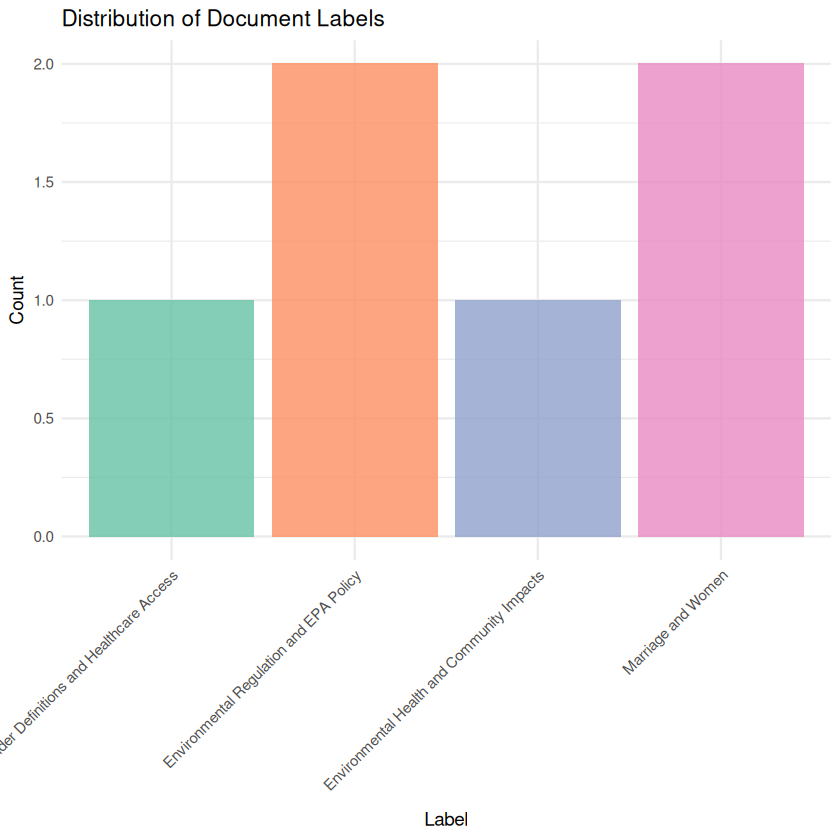

In [94]:
# Visualize class distribution
clean_MFL_text %>%
  filter(!is.na(label))%>%
  ggplot(aes(x = label, fill = label)) +
  geom_bar(alpha = 0.8) +
  labs(title = "Distribution of Document Labels",
       x = "Label",
       y = "Count") +
  theme_minimal() +
  scale_fill_brewer(type = "qual", palette = "Set2") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none") 

In [95]:
#Tokenize
MFL_text_tokens <- clean_MFL_text %>% 
    unnest_tokens(word, text) %>% 
    anti_join(stop_words, by = "word") %>% 
    filter(nchar(word) > 1) %>% 
    filter(!str_detect(word, "^\\d+")) %>% 
    filter(str_detect(word, "^[a-z]+$"))

MFL_text_tokens


document_id,label,word
<int>,<fct>,<chr>
1,Environmental Regulation and EPA Policy,section
2,Marriage and Women,welfare
3,Gender Definitions and Healthcare Access,founders
3,Gender Definitions and Healthcare Access,wrote
3,Gender Definitions and Healthcare Access,constitution
3,Gender Definitions and Healthcare Access,federal
3,Gender Definitions and Healthcare Access,government
3,Gender Definitions and Healthcare Access,promote
3,Gender Definitions and Healthcare Access,welfare


In [98]:
# Join with sentiment lexicon 
bing_sentiment <- get_sentiments("bing")

MFL_text_sentiment <- MFL_text_tokens %>% 
    inner_join(bing_sentiment, by = "word") %>% 
    count(document_id, sentiment) %>% 
    tidyr::pivot_wider( 
        names_from = sentiment, 
        values_from = n, 
        values_fill = 0 ) %>% 
    mutate(sentiment_score = positive - negative)

MFL_text_sentiment

document_id,positive,negative,sentiment_score
<int>,<int>,<int>,<int>
3,1,0,1
4,0,1,-1
5,3,5,-2
6,2,4,-2
7,0,3,-3
8,8,3,5
9,8,4,4
10,2,4,-2
11,4,4,0


In [100]:
#Join seniment and label
MFL_text_with_sentiment <- MFL_text_sentiment %>% 
    left_join(clean_MFL_text %>% 
    select(document_id, label), 
    by = "document_id")

MFL_text_with_sentiment

document_id,positive,negative,sentiment_score,label
<int>,<int>,<int>,<int>,<fct>
3,1,0,1,Gender Definitions and Healthcare Access
4,0,1,-1,Environmental Regulation and EPA Policy
5,3,5,-2,Environmental Health and Community Impacts
6,2,4,-2,Marriage and Women
7,0,3,-3,NA
8,8,3,5,NA
9,8,4,4,NA
10,2,4,-2,NA
11,4,4,0,NA


In [103]:
# Get basic information about our dataset

cat("Number of documents:", nrow(clean_MFL_text), "\n")
cat("Number of unique labels:", length(unique(clean_MFL_text$label)), "\n")
cat("Label distribution:\n")

#Create an empty factor column with correct levels
clean_MFL_text$label <- factor(rep(NA,nrow(clean_MFL_text)), 
                             levels = c(
                            "Reproductive and Maternal Health",             
                            "Contraception and Family Planning",                                           
                            "Gender Definitions and Healthcare Access",
                            "Environmental Regulation and EPA Policy",
                            "Environmental Health and Community Impacts",
                            "Marriage and Women"))

clean_MFL_text$label[1] <- "Environmental Regulation and EPA Policy" 
clean_MFL_text$label[2] <- "Marriage and Women"
clean_MFL_text$label[3] <- "Gender Definitions and Healthcare Access"
clean_MFL_text$label[4] <- "Environmental Regulation and EPA Policy"
clean_MFL_text$label[5] <- "Environmental Health and Community Impacts"
clean_MFL_text$label[6] <- "Marriage and Women"

table(clean_MFL_text$label) 

# Tokenize the text into individual words using tidytext-style R pipeline for turning a cleaned text dataset into a tidy table of word tokens

MFL_text_tokens <- clean_MFL_text %>%
  unnest_tokens(word, text, token = "words")%>%
  anti_join(stop_words, by = "word") %>%
  filter(nchar(word) > 1) %>%
  filter(!str_detect(word, "^\\d+"))%>%
  filter(!str_detect(word, "www"))%>%
  filter(!str_detect(word, "october"))%>%
  filter(!str_detect(word, "percent"))%>%
  filter(!str_detect(word, "org"))%>%
  filter(!str_detect(word, "gov"))%>%
  filter(!str_detect(word, "https"))%>%
  filter(str_detect(word, "^[a-z]+$"))%>%
  mutate(document_id = row_number())

MFL_text_tokens

MFL_text_tokens %>% count(document_id)


Number of documents: 2606 


Number of unique labels: 1 


Label distribution:



          Reproductive and Maternal Health 
                                         0 
         Contraception and Family Planning 
                                         0 
  Gender Definitions and Healthcare Access 
                                         1 
   Environmental Regulation and EPA Policy 
                                         2 
Environmental Health and Community Impacts 
                                         1 
                        Marriage and Women 
                                         2 

document_id,label,word
<int>,<fct>,<chr>
1,Environmental Regulation and EPA Policy,section
2,Marriage and Women,welfare
3,Gender Definitions and Healthcare Access,founders
4,Gender Definitions and Healthcare Access,wrote
5,Gender Definitions and Healthcare Access,constitution
6,Gender Definitions and Healthcare Access,federal
7,Gender Definitions and Healthcare Access,promote
8,Gender Definitions and Healthcare Access,welfare
9,Gender Definitions and Healthcare Access,fathomed


document_id,n
<int>,<int>
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [104]:
# Get basic statistics about our tokenized data
cat("Total number of tokens:", nrow(MFL_text_tokens), "\n")           
cat("Number of unique words:", length(unique(MFL_text_tokens$word)), "\n")
cat("Average words per document:", round(nrow(MFL_text_tokens) / length(unique(MFL_text_tokens$document_id)), 1), "\n")

Total number of tokens: 46441 


Number of unique words: 7677 


Average words per document: 1 


In [105]:
# Calculate word frequencies
MFL_word_freq <- MFL_text_tokens %>%
  count(word, sort = TRUE) %>%
  mutate(percentage = n / sum(n) * 100)

MFL_word_freq

word,n,percentage
<chr>,<int>,<dbl>
federal,368,0.7924033
administration,360,0.7751771
energy,346,0.7450313
programs,264,0.5684632
program,255,0.5490838
office,241,0.5189380
congress,232,0.4995586
health,210,0.4521866
act,204,0.4392670


In [106]:
# Display the top 50 most frequent words
MFL_word_freq %>%
  head(50) %>%
  kable(col.names = c("Word", "Count", "Percentage"))



|Word           | Count| Percentage|
|:--------------|-----:|----------:|
|federal        |   368|  0.7924033|
|administration |   360|  0.7751771|
|energy         |   346|  0.7450313|
|programs       |   264|  0.5684632|
|program        |   255|  0.5490838|
|office         |   241|  0.5189380|
|congress       |   232|  0.4995586|
|health         |   210|  0.4521866|
|act            |   204|  0.4392670|
|national       |   177|  0.3811287|
|american       |   170|  0.3660559|
|ensure         |   163|  0.3509830|
|public         |   158|  0.3402166|
|biden          |   150|  0.3229905|
|department     |   143|  0.3079176|
|policy         |   136|  0.2928447|
|nuclear        |   134|  0.2885381|
|private        |   134|  0.2885381|
|including      |   133|  0.2863849|
|resources      |   129|  0.2777718|
|policies       |   126|  0.2713120|
|epa            |   125|  0.2691587|
|agency         |   123|  0.2648522|
|based          |   123|  0.2648522|
|care           |   120|  0.2583924|

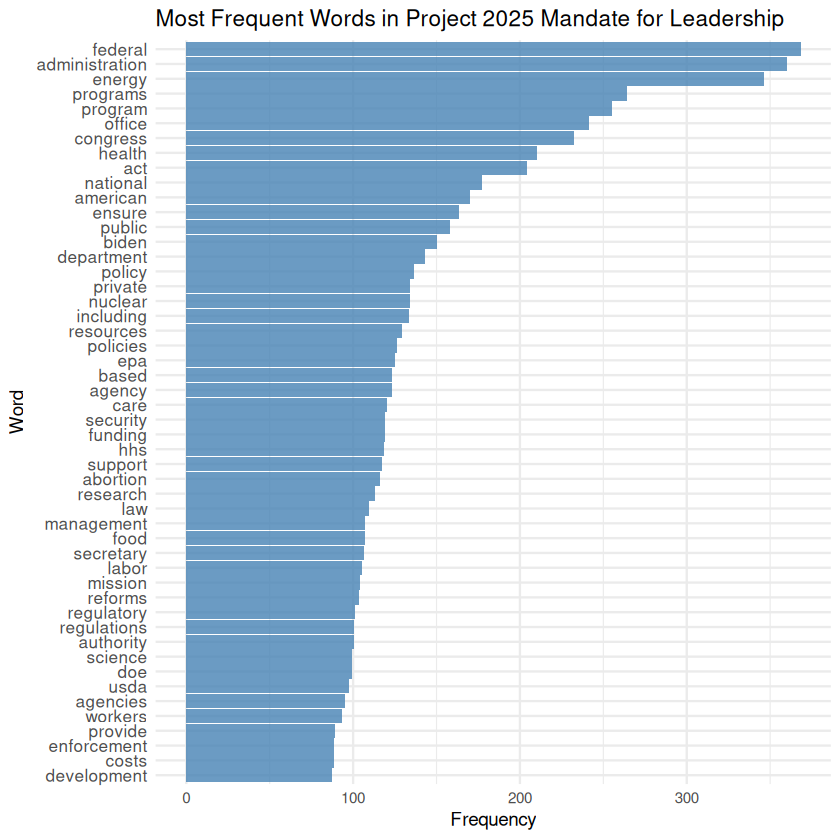

In [107]:
# Create a bar plot of the top 50 most frequent words
MFL_word_freq %>%
  head(50) %>%
  ggplot(aes(x = reorder(word, n), y = n)) +
  geom_col(fill = "steelblue", alpha = 0.8) +
  coord_flip() +
  labs(title = "Most Frequent Words in Project 2025 Mandate for Leadership",
       x = "Word",
       y = "Frequency") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 10))

In [108]:
# Prepare data for word cloud (top 50 words)
library(wordcloud2)

MFL_wordcloud_data <- MFL_word_freq %>%
  head(50) %>% 
  select(word, n)

# Create word cloud
wordcloud2(MFL_wordcloud_data, 
          size = 0.8, 
          color = "random-dark", 
          backgroundColor = "white")

HTML widgets cannot be represented in plain text (need html)

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
aborted,negative


Words with Most Emotional Content 1 sentiment words):


Positive words: 1 Negative words: 0 


Overall sentiment score: 1 



modern 



Original Document Text:


Taking these factors into account, below is a model USDA mission statement: 



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.0000 -1.0000  1.0000  0.1456  1.0000  1.0000 

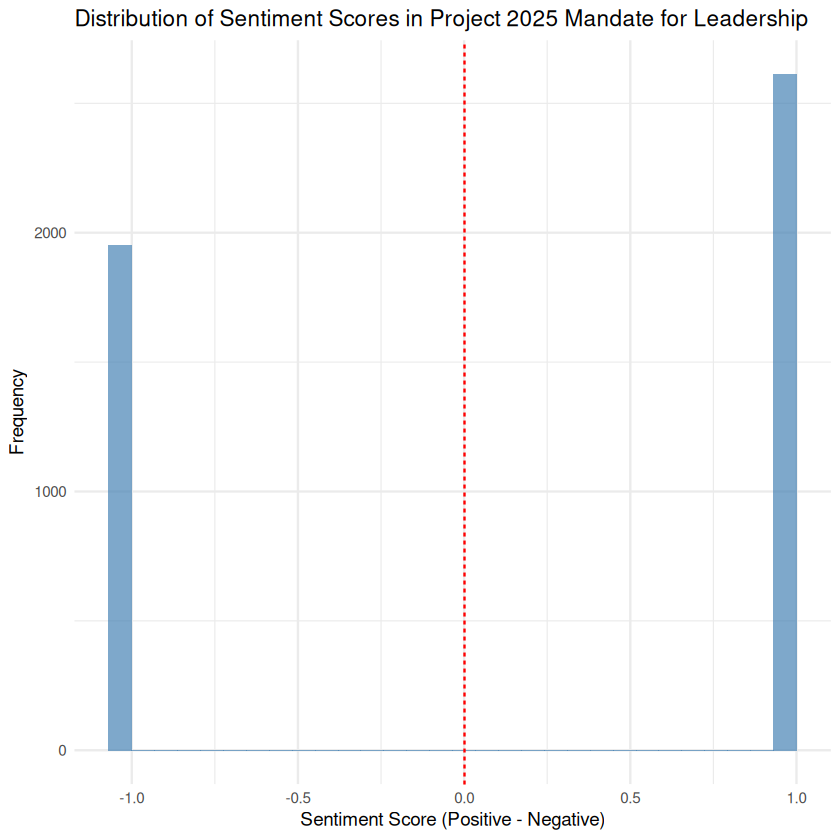

In [109]:
# Get sentiment lexicons
bing_sentiment <- get_sentiments("bing")

# Display some entries from the Bing sentiment lexicon
head(bing_sentiment, 20)

# Perform sentiment analysis
MFL_text_sentiment <- MFL_text_tokens %>%
  inner_join(bing_sentiment, by = "word") %>%
  count(document_id, sentiment) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(sentiment_score = positive - negative)

# Add sentiment back to original documents
MFL_text_with_sentiment <- MFL_text_sentiment %>%
  replace_na(list(positive = 0, negative = 0, sentiment_score = 0))

# Create a histogram of sentiment scores
ggplot(MFL_text_with_sentiment, aes(x = sentiment_score)) +
  geom_histogram(bins = 30, fill = "steelblue", alpha = 0.7) +
  geom_vline(xintercept = 0, color = "red", linetype = "dashed") +
  labs(title = "Distribution of Sentiment Scores in Project 2025 Mandate for Leadership",
       x = "Sentiment Score (Positive - Negative)",
       y = "Frequency") +
  theme_minimal()


# Find the document with the highest combined positive + negative sentiment words
MFL_most_emotional <- MFL_text_with_sentiment %>%
  mutate(MFL_total_sentiment_words = positive + negative) %>%
  arrange(desc(MFL_total_sentiment_words)) %>%
  slice_head(n = 1)

# Get the tokens for this document with sentiment
MFL_emotional_doc_tokens <- MFL_text_tokens %>%
  filter(document_id == MFL_most_emotional$document_id) %>%
  left_join(bing_sentiment, by = "word") %>%
  mutate(sentiment = replace_na(sentiment, "neutral"))

# Create colored text output
cat("Words with Most Emotional Content",                MFL_most_emotional$MFL_total_sentiment_words, "sentiment words):\n")
cat("Positive words:", MFL_most_emotional$positive, "Negative words:",    MFL_most_emotional$negative, "\n")
cat("Overall sentiment score:", MFL_most_emotional$sentiment_score, "\n\n")

# Print the text with colored sentiment words
MFL_words_with_sentiment <- MFL_emotional_doc_tokens %>%
  mutate(colored_word = case_when(
    sentiment == "positive" ~ paste0("\033[32m", word, "\033[0m"),  #Green 
    sentiment == "negative" ~ paste0("\033[31m", word, "\033[0m"),  # Red 
    TRUE ~ word  # No color for neutral
  ))

# Combine words back into text
colored_text <- paste(MFL_words_with_sentiment$colored_word, collapse = " ")
cat(colored_text, "\n\n")

# Print the original document text
emotional_doc <- MFL_text_tbl %>%
  filter(document_id == MFL_most_emotional$document_id) 
  
original_text<-emotional_doc%>% pull(text)

cat("Original Document Text:\n")
cat(str_wrap(original_text, width = 80), "\n\n")

# Display summary statistics
summary(MFL_text_with_sentiment$sentiment_score)



In [110]:
# Create environmental reproductive health-related dictionaries containing single or "tokenized" words
health_dict <- list(
  reproduction_terms = c("pregnancy", "abortion", "fertility", "mothers", "women", "father"),
  action_terms = c("mandate", "policy", "agreement", "target", "reduction", "mitigation"),
  impact_terms = c("impact", "effect", "damage", "efficiency", "crisis", "emergency", "decline"),
  solution_terms = c("solution", "eliminate", "strengthen", "marriage", "prohibit", "decentralize", "deregulate", "monitor", "investigate", "defund", "population", "restrict", "reform", "enforce", "faith", "creator"),
  policy_terms = c("executive", "reform", "oversight", "enforcement", "agency"),
  sector_terms = c("faith", "family", "maternal")
)

# Analyze usage of environment-related terms
repro_analysis <- MFL_text_tokens %>%
  mutate(
    reproduction_related = word %in% health_dict$reproduction_terms,
    action_related = word %in% health_dict$action_terms,
    impact_related = word %in% health_dict$impact_terms,
    solution_related = word %in% health_dict$solution_terms,
    policy_related = word %in% health_dict$policy_terms,
    sector_related = word %in% health_dict$sector_terms
  ) %>%
  group_by(document_id) %>%
  summarise(
    reproduction_count = sum(reproduction_related),
    action_count = sum(action_related),
    impact_count = sum(impact_related),
    solution_count = sum(solution_related),
    policy_count = sum(policy_related),  
    sector_count = sum(sector_related)  
  )

# Display summary
repro_analysis %>%
  summarise(
    total_reproduction = sum(reproduction_count),
    total_action = sum(action_count),
    total_impact = sum(impact_count),
    total_solution = sum(solution_count),
    total_policy = sum(policy_count),  
    total_sector = sum(sector_count)  
  ) %>%
  gather(category, count) %>%
  kable( col.names = c("Category", "Total Count"))




|Category           | Total Count|
|:------------------|-----------:|
|total_reproduction |         208|
|total_action       |         205|
|total_impact       |         119|
|total_solution     |         286|
|total_policy       |         347|
|total_sector       |          96|

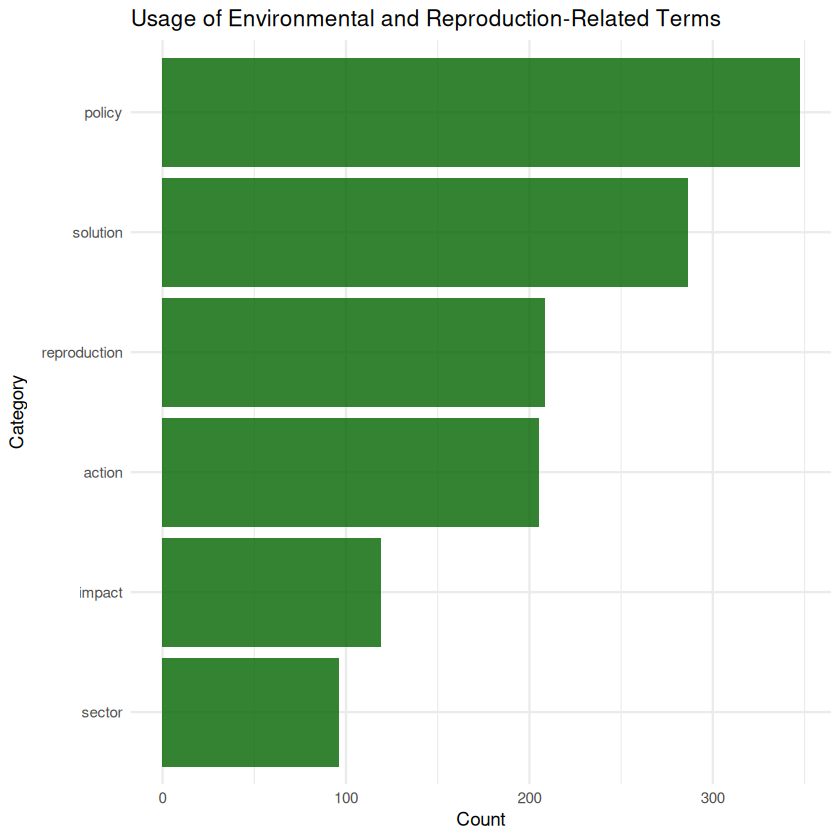

In [111]:
# Visualize environment and reproduction-related term usage
repro_analysis %>%
  summarise(
    reproduction = sum(reproduction_count),
    action = sum(action_count),
    impact = sum(impact_count),
    solution = sum(solution_count),
    policy = sum(policy_count),  
    sector = sum(sector_count),  
  ) %>%
  gather(category, count) %>%
  ggplot(aes(x = reorder(category, count), y = count)) +
  geom_col(fill = "darkgreen", alpha = 0.8) +
  coord_flip() +
  labs(title = "Usage of Environmental and Reproduction-Related Terms",
       x = "Category",
       y = "Count") +
  theme_minimal()

In [112]:
# Combine environment/reproduction analysis with sentiment analysis

# Add labels back to our sentiment analysis 
MFL_text_with_sentiment <- MFL_text_sentiment %>% 
    left_join( clean_MFL_text %>% 
    select(document_id, label),
    by = "document_id" )

MFL_sentiment_analysis <- repro_analysis %>%
  left_join(MFL_text_with_sentiment %>%
        select(document_id, sentiment_score) %>%
        group_by(document_id) %>%
        summarise(avg_sentiment = mean(sentiment_score, na.rm = TRUE)),
    by = "document_id") 

# Create separate datasets for each category based on term presence
reproduction_docs <- MFL_sentiment_analysis %>% filter(reproduction_count > 0)
action_docs <- MFL_sentiment_analysis %>% filter (action_count > 0)
impact_docs <- MFL_sentiment_analysis %>% filter(impact_count > 0)
solution_docs <- MFL_sentiment_analysis %>% filter(solution_count > 0)
policy_docs <- MFL_sentiment_analysis %>% filter(policy_count > 0)
sector_docs <- MFL_sentiment_analysis %>% filter (sector_count > 0)

# Calculate sentiment for each category
category_sentiment <- tibble(
    category = c("reproduction", "action", "impact", "solution", "policy", "sector"),
    documents = c(nrow(reproduction_docs), nrow(action_docs), nrow(impact_docs), 
    nrow(solution_docs), nrow(policy_docs), nrow(sector_docs)
    ),
    avg_sentiment =c(
        mean(reproduction_docs$avg_sentiment, na.rm=TRUE),
        mean(action_docs$avg_sentiment, na.rm=TRUE),
        mean(impact_docs$avg_sentiment, na.rm=TRUE),
        mean(solution_docs$avg_sentiment, na.rm=TRUE),
        mean(policy_docs$avg_sentiment, na.rm=TRUE),
        mean(sector_docs$avg_sentiment, na.rm=TRUE)            
    )
)

# Display summary of environment terms and sentiment
category_sentiment %>%
  kable(col.names = c("Category", "Document Count", "Average Sentiment"))




|Category     | Document Count| Average Sentiment|
|:------------|--------------:|-----------------:|
|reproduction |            208|               NaN|
|action       |            205|               NaN|
|impact       |            119|        -1.0000000|
|solution     |            286|         0.4545455|
|policy       |            347|         0.4851485|
|sector       |             96|         1.0000000|

In [113]:
# Add labels back to our sentiment analysis

MFL_text_with_labels <- MFL_text_sentiment %>% 
    left_join( clean_MFL_text %>% 
    select(document_id, label), by = "document_id" ) 

# Filter to labeled documents 
MFL_text_topic_sentiment <- MFL_text_with_labels %>% 
    filter(!is.na(label)) %>% 
    select(document_id, label, sentiment_score)
  

# Analyze sentiment by topic
topic_sentiment_summary <- MFL_text_topic_sentiment %>% 
    filter(!is.na(label)) %>%    
    group_by(label) %>% 
    summarise( 
        mean_sentiment = mean(sentiment_score, na.rm = TRUE), 
        median_sentiment = median(sentiment_score, na.rm = TRUE), 
        count = n() 
    )

# Display results
topic_sentiment_summary %>%
  kable(
        col.names = c("Topic Label", "Mean Sentiment", "Median Sentiment", "Document Count"))





|Topic Label | Mean Sentiment| Median Sentiment| Document Count|
|:-----------|--------------:|----------------:|--------------:|

In [114]:
cat("clean_MFL_text columns:\n") 
print(colnames(clean_MFL_text)) 
cat("\nMFL_text_sentiment columns:\n") 
print(colnames(MFL_text_sentiment))
cat("\nHead of MFL_text_sentiment:\n") 
print(head(MFL_text_sentiment, 10))
cat("\nHead of MFL_text_with_sentiment:\n") 
print(head(MFL_text_with_sentiment, 10))

clean_MFL_text columns:


[1] "document_id" "text"        "label"      



MFL_text_sentiment columns:


[1] "document_id"     "negative"        "positive"        "sentiment_score"



Head of MFL_text_sentiment:


# A tibble: 10 × 4
   document_id negative positive sentiment_score
         <int>    <dbl>    <dbl>           <dbl>
 1          36        0        1               1
 2          46        1        0              -1
 3         102        1        0              -1
 4         103        1        0              -1
 5         110        0        1               1
 6         117        0        1               1
 7         123        0        1               1
 8         127        1        0              -1
 9         155        1        0              -1
10         156        1        0              -1



Head of MFL_text_with_sentiment:


# A tibble: 10 × 5
   document_id negative positive sentiment_score label
         <int>    <dbl>    <dbl>           <dbl> <fct>
 1          36        0        1               1 NA   
 2          46        1        0              -1 NA   
 3         102        1        0              -1 NA   
 4         103        1        0              -1 NA   
 5         110        0        1               1 NA   
 6         117        0        1               1 NA   
 7         123        0        1               1 NA   
 8         127        1        0              -1 NA   
 9         155        1        0              -1 NA   
10         156        1        0              -1 NA   


In [115]:
#Sanity check

cat("Unique IDs in clean_MFL_text:\n") 
print(head(sort(unique(clean_MFL_text$document_id)), 20)) 
cat("\nUnique IDs in MFL_text_sentiment:\n") 
print(head(sort(unique(MFL_text_sentiment$document_id)), 20))

Unique IDs in clean_MFL_text:


 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20



Unique IDs in MFL_text_sentiment:


 [1]  36  46 102 103 110 117 123 127 155 156 167 176 187 201 223 225 235 260 264
[20] 283


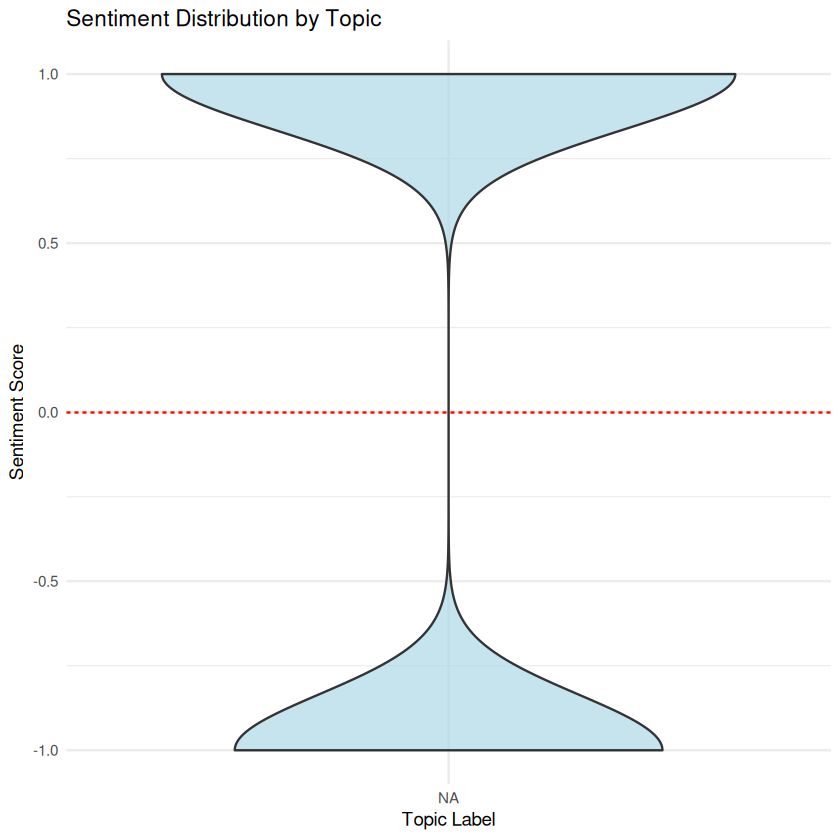

In [116]:
# Visualize sentiment by topic
ggplot(MFL_text_with_sentiment, aes(x = factor(label), y = sentiment_score)) +
  geom_violin(fill = "lightblue", alpha = 0.7) +
  geom_hline(yintercept = 0, color = "red", linetype = "dashed") +
  labs(title = "Sentiment Distribution by Topic",
       x = "Topic Label",
       y = "Sentiment Score") +
  theme_minimal()